# Práctica 1

Práctica realizada por Samuel Juárez Gordon, Alejandra Lorenzana Enrique, Iker Rodríguez Hernández y Raul Vara García

## Uso de librerías

In [1]:
# importar las librerías necesarias
import os
import itertools
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dropout
from keras.models import load_model
import shutil



## Clasificador 1

## Prepocesamiento de datos

### Definición del directorio de trabajo y los directorios de los datos

In [175]:
base_dir = './chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'test')
test_dir = os.path.join(base_dir, 'val')

### Generación de nuevas imágenes

Estos bloques de código están comentados porque se generaron al principio de todos los intentos y no queríamos generar de más. Como se comenta en la memoria, hay una gran desbalanceo de datos entre normal y pneumonía, ademmás de un gran desnivel en la calidad de las fotos de la clase normal. Por ese motivo, hemos generado más imágenes de tipo normal en las capretas de datos de entrenamiento y de validación.

### Imágenes nuevas de tipo NORMAL para el entrenamiento

In [176]:
'''
# Directorio que contiene las imágenes originales
directorio_imagenes_originales = "./chest_xray/train/NORMAL/"

# Directorio donde guardarás las nuevas imágenes generadas
directorio_destino = "./chest_xray/train/NORMAL/"

# Carga las imágenes originales desde la carpeta
imagenes_originales = []
for nombre_archivo in os.listdir(directorio_imagenes_originales):
    ruta_archivo = os.path.join(directorio_imagenes_originales, nombre_archivo)
    if os.path.isfile(ruta_archivo):
        imagen = cv2.imread(ruta_archivo)
        imagenes_originales.append(imagen)

# Aplica técnicas de aumento de datos para generar nuevas imágenes
imagenes_generadas = []
for imagen_original in imagenes_originales:
    # Aquí puedes aplicar diferentes técnicas de aumento de datos, como rotación, escala, cambio de brillo/contraste, etc.
    # Por ejemplo, vamos a voltear horizontalmente la imagen y cambiar su brillo
    imagen_flip = cv2.flip(imagen_original, 1)  # 1 para flip horizontal
    imagen_brillo = cv2.add(imagen_original, np.array([50.0]))  # Aumenta el brillo en 50

    # Genera ruido gaussiano en la imagen
    mean = 0
    std = 25  # Cambiar este valor para ajustar la intensidad del ruido
    imagen_ruido_gaussiano = np.zeros(imagen_original.shape, dtype=np.uint8)
    cv2.randn(imagen_ruido_gaussiano, mean, std)
    imagen_con_ruido = cv2.add(imagen_original, imagen_ruido_gaussiano)

    # Agrega las imágenes generadas a la lista de imágenes generadas
    imagenes_generadas.append(imagen_flip)
    imagenes_generadas.append(imagen_brillo)
    imagenes_generadas.append(imagen_con_ruido)

# Guarda las imágenes generadas en el directorio de destino
for i, imagen_generada in enumerate(imagenes_generadas):
    nombre_archivo = f"imagen_generada_{i}.jpeg"  # Cambia la extensión dependiendo del tipo de imagen
    ruta_archivo = os.path.join(directorio_destino, nombre_archivo)
    cv2.imwrite(ruta_archivo, imagen_generada)

print("Imágenes generadas guardadas exitosamente.")
'''

'\n# Directorio que contiene las imágenes originales\ndirectorio_imagenes_originales = "./chest_xray/train/NORMAL/"\n\n# Directorio donde guardarás las nuevas imágenes generadas\ndirectorio_destino = "./chest_xray/train/NORMAL/"\n\n# Carga las imágenes originales desde la carpeta\nimagenes_originales = []\nfor nombre_archivo in os.listdir(directorio_imagenes_originales):\n    ruta_archivo = os.path.join(directorio_imagenes_originales, nombre_archivo)\n    if os.path.isfile(ruta_archivo):\n        imagen = cv2.imread(ruta_archivo)\n        imagenes_originales.append(imagen)\n\n# Aplica técnicas de aumento de datos para generar nuevas imágenes\nimagenes_generadas = []\nfor imagen_original in imagenes_originales:\n    # Aquí puedes aplicar diferentes técnicas de aumento de datos, como rotación, escala, cambio de brillo/contraste, etc.\n    # Por ejemplo, vamos a voltear horizontalmente la imagen y cambiar su brillo\n    imagen_flip = cv2.flip(imagen_original, 1)  # 1 para flip horizontal\

### Imágenes nuevas de tipo NORMAL para la validación

In [177]:
'''
# Directorio que contiene las imágenes originales
directorio_imagenes_originales = "./chest_xray/test/NORMAL/"

# Directorio donde guardarás las nuevas imágenes generadas
directorio_destino = "./chest_xray/test/NORMAL/"

# Carga las imágenes originales desde la carpeta
imagenes_originales = []
for nombre_archivo in os.listdir(directorio_imagenes_originales):
    ruta_archivo = os.path.join(directorio_imagenes_originales, nombre_archivo)
    if os.path.isfile(ruta_archivo):
        imagen = cv2.imread(ruta_archivo)
        imagenes_originales.append(imagen)

# Aplica técnicas de aumento de datos para generar nuevas imágenes
imagenes_generadas = []
for imagen_original in imagenes_originales:
    # Aquí puedes aplicar diferentes técnicas de aumento de datos, como rotación, escala, cambio de brillo/contraste, etc.
    # Por ejemplo, vamos a cambiar su brillo
    imagen_brillo = cv2.add(imagen_original, np.array([50.0]))  # Aumenta el brillo en 50


    # Agrega las imágenes generadas a la lista de imágenes generadas
    imagenes_generadas.append(imagen_brillo)

# Guarda las imágenes generadas en el directorio de destino
for i, imagen_generada in enumerate(imagenes_generadas):
    nombre_archivo = f"imagen_generada_{i}.jpeg"  # Cambia la extensión dependiendo del tipo de imagen
    ruta_archivo = os.path.join(directorio_destino, nombre_archivo)
    cv2.imwrite(ruta_archivo, imagen_generada)

print("Imágenes generadas guardadas exitosamente.")
'''

'\n# Directorio que contiene las imágenes originales\ndirectorio_imagenes_originales = "./chest_xray/test/NORMAL/"\n\n# Directorio donde guardarás las nuevas imágenes generadas\ndirectorio_destino = "./chest_xray/test/NORMAL/"\n\n# Carga las imágenes originales desde la carpeta\nimagenes_originales = []\nfor nombre_archivo in os.listdir(directorio_imagenes_originales):\n    ruta_archivo = os.path.join(directorio_imagenes_originales, nombre_archivo)\n    if os.path.isfile(ruta_archivo):\n        imagen = cv2.imread(ruta_archivo)\n        imagenes_originales.append(imagen)\n\n# Aplica técnicas de aumento de datos para generar nuevas imágenes\nimagenes_generadas = []\nfor imagen_original in imagenes_originales:\n    # Aquí puedes aplicar diferentes técnicas de aumento de datos, como rotación, escala, cambio de brillo/contraste, etc.\n    # Por ejemplo, vamos a cambiar su brillo\n    imagen_brillo = cv2.add(imagen_original, np.array([50.0]))  # Aumenta el brillo en 50\n\n\n    # Agrega las

### Definición de hiperparámetros de la red convolucional

In [178]:
IMG_WIDTH = 150
IMG_HEIGHT = 150

# definir los parámetros de la red convolucional
input_shape = (IMG_WIDTH, IMG_HEIGHT,1)
num_classes = 2
learning_rate = 0.0001
batch_size = 16
epochs = 1000

# Clasificación 1: Pneumonia vs Normal
CLASS_NAMES = ['Normal', 'Pneumonia']


## División de los datos en Datasets

### Train Dataset

In [179]:
# crear generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2
    )

In [180]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical')

Found 5216 images belonging to 2 classes.


### Representación visual del número de datos de la carpeta

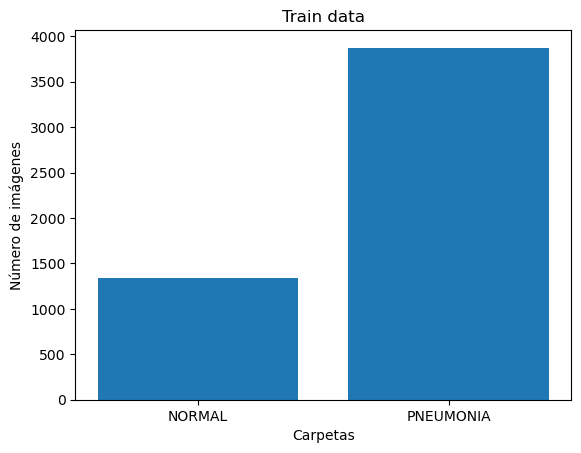

In [181]:
def contar_imagenes(carpeta):
    total_imagenes = 0

    for ruta, carpetas, archivos in os.walk(carpeta):
        for archivo in archivos:
            if archivo.endswith(".jpg") or archivo.endswith(".png") or archivo.endswith(".jpeg"):
                # Puedes agregar más extensiones de archivo si es necesario
                total_imagenes += 1

    return total_imagenes

carpeta_principal = train_dir
carpetas = ["NORMAL", "PNEUMONIA"]  # Nombres de tus subcarpetas

nombres_carpeta = []
total_imagenes = []

for carpeta in carpetas:
    ruta_carpeta = os.path.join(carpeta_principal, carpeta)
    total = contar_imagenes(ruta_carpeta)
    nombres_carpeta.append(carpeta)
    total_imagenes.append(total)

# Crear gráfica de barras
plt.bar(nombres_carpeta, total_imagenes)
plt.xlabel("Carpetas")
plt.ylabel("Número de imágenes")
plt.title("Train data")
plt.show()

### Val Dataset

In [182]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical')

Found 624 images belonging to 2 classes.


### Representación visual del número de datos de la carpeta

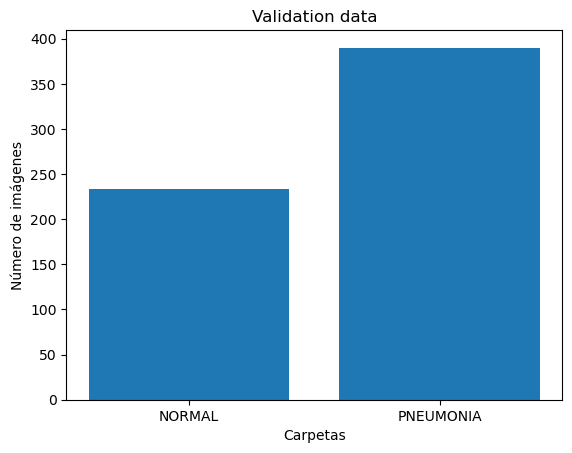

In [183]:
def contar_imagenes(carpeta):
    total_imagenes = 0

    for ruta, carpetas, archivos in os.walk(carpeta):
        for archivo in archivos:
            if archivo.endswith(".jpg") or archivo.endswith(".png") or archivo.endswith(".jpeg"):
                # Puedes agregar más extensiones de archivo si es necesario
                total_imagenes += 1

    return total_imagenes

carpeta_principal = val_dir
carpetas = ["NORMAL", "PNEUMONIA"]  # Nombres de tus subcarpetas

nombres_carpeta = []
total_imagenes = []

for carpeta in carpetas:
    ruta_carpeta = os.path.join(carpeta_principal, carpeta)
    total = contar_imagenes(ruta_carpeta)
    nombres_carpeta.append(carpeta)
    total_imagenes.append(total)

# Crear gráfica de barras
plt.bar(nombres_carpeta, total_imagenes)
plt.xlabel("Carpetas")
plt.ylabel("Número de imágenes")
plt.title("Validation data")
plt.show()

### Test Dataset

In [184]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    shuffle = False,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical')

Found 16 images belonging to 2 classes.


### Representación visual del número de datos de la carpeta

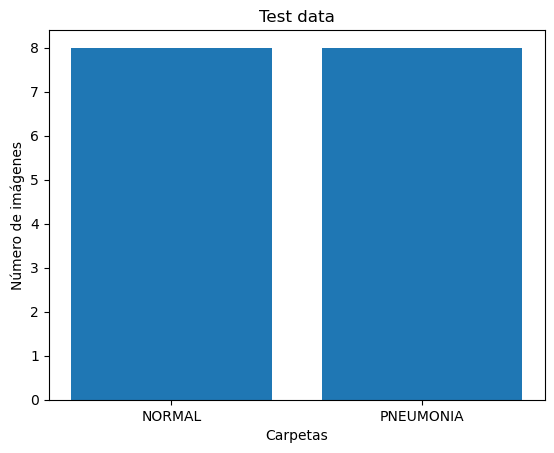

In [185]:
def contar_imagenes(carpeta):
    total_imagenes = 0

    for ruta, carpetas, archivos in os.walk(carpeta):
        for archivo in archivos:
            if archivo.endswith(".jpg") or archivo.endswith(".png") or archivo.endswith(".jpeg"):
                # Puedes agregar más extensiones de archivo si es necesario
                total_imagenes += 1

    return total_imagenes

carpeta_principal = test_dir
carpetas = ["NORMAL", "PNEUMONIA"]  # Nombres de tus subcarpetas

nombres_carpeta = []
total_imagenes = []

for carpeta in carpetas:
    ruta_carpeta = os.path.join(carpeta_principal, carpeta)
    total = contar_imagenes(ruta_carpeta)
    nombres_carpeta.append(carpeta)
    total_imagenes.append(total)

# Crear gráfica de barras
plt.bar(nombres_carpeta, total_imagenes)
plt.xlabel("Carpetas")
plt.ylabel("Número de imágenes")
plt.title("Test data")
plt.show()

## Arquitectura de la red

In [186]:
# definir la arquitectura de la red
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

### Reprensetaciones visuales de la arquitectura de la red

In [187]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 17, 17, 64)      

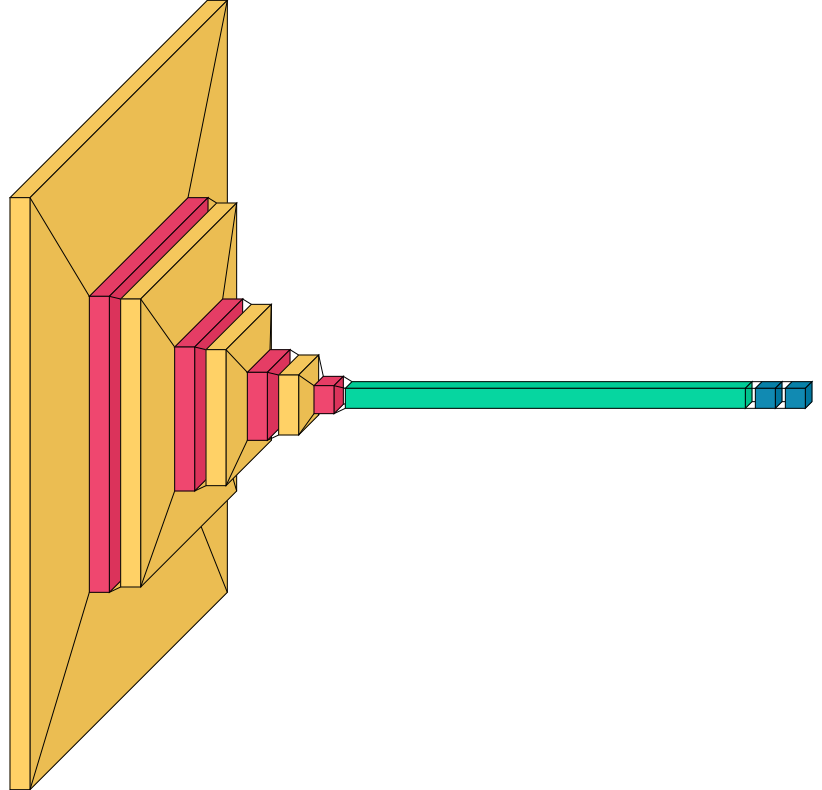

In [188]:
# VisualizaMOS el modelo con VisualKeras
visualkeras.layered_view(model)


## Compilación del modelo

In [189]:
# compilar el modelo
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=categorical_crossentropy,
              metrics=['accuracy'])

## Entrenamiento + validación del modelo

In [190]:
# Crear el callback StopTrainingCallback
class StopTrainingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if logs.get('loss') <= 0.2:  # Detener el entrenamiento cuando la périda alcance 0.2
            self.model.stop_training = True
            
stop = StopTrainingCallback()

In [191]:
# Entrenar el modelo con el callback EarlyStopping
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[stop]
)

Epoch 1/1000
326/326 [==============================] - 43s 130ms/step - loss: 0.4742 - accuracy: 0.7874 - val_loss: 0.3575 - val_accuracy: 0.8510
Epoch 2/1000
326/326 [==============================] - 43s 131ms/step - loss: 0.2535 - accuracy: 0.8924 - val_loss: 0.2885 - val_accuracy: 0.8862
Epoch 3/1000
326/326 [==============================] - 45s 138ms/step - loss: 0.2076 - accuracy: 0.9126 - val_loss: 0.5424 - val_accuracy: 0.7885
Epoch 4/1000
326/326 [==============================] - 43s 133ms/step - loss: 0.1992 - accuracy: 0.9216 - val_loss: 0.2703 - val_accuracy: 0.8926


### Guardado del modelo ejecutado en un archivo externo

Hacemos esto para poder acceder a los datos de este modelo sin tener que volver ha ejecutar el comando model.fit(), ya que ha tardado bastante tiempo.

In [192]:
model.save('ModeloBueno.h5')

In [193]:
# Cargar el modelo guardado
model = load_model('ModeloBueno.h5')

### Gráficas de evolución de los parámetros val y loss en el entrenamiento y la validación

Text(0.5, 1.0, 'Evolución de precisión')

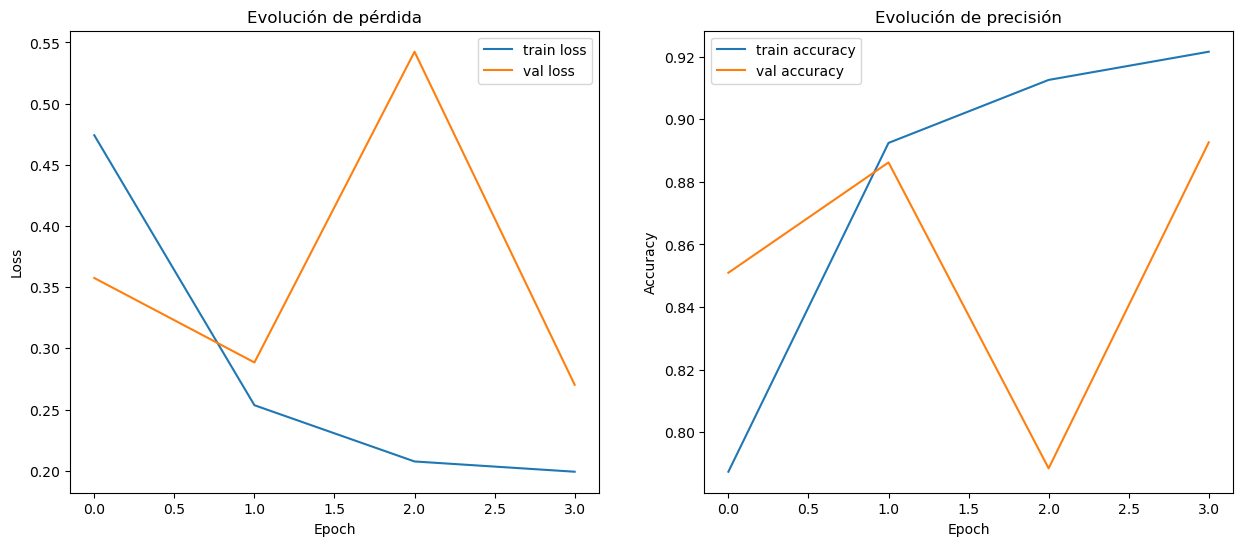

In [194]:
import matplotlib.pyplot as plt

# Obtener los valores de pérdida y precisión del historial de entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fig, ax = plt.subplots(1,2, figsize=(15,6))
ax[0].plot(train_loss, label='train loss')
ax[0].plot(val_loss, label='val loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].set_title('Evolución de pérdida')

ax[1].plot(train_acc, label='train accuracy')
ax[1].plot(val_acc, label='val accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].set_title('Evolución de precisión')

## Predicción del modelo

In [195]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [196]:
# Hacer predicciones en el conjunto de prueba
test_pred = model.predict(test_generator)
test_pred_labels = np.argmax(test_pred, axis=1)


# Calcular el porcentaje de aciertos
correct_pred = np.sum(test_pred_labels == test_generator.classes)
total_pred = len(test_generator.classes)
accuracy = correct_pred / total_pred * 100

print('Test prediction: {:.2f}%'.format(accuracy))

1/1 [==============================] - 0s 161ms/step
Test prediction: 75.00%


In [197]:
test_pred

array([[0.48364264, 0.5163573 ],
       [0.7945931 , 0.205407  ],
       [0.02251153, 0.9774885 ],
       [0.4612309 , 0.538769  ],
       [0.04565642, 0.9543435 ],
       [0.5394345 , 0.4605655 ],
       [0.5532957 , 0.44670433],
       [0.8648944 , 0.13510562],
       [0.0106143 , 0.9893857 ],
       [0.02215713, 0.97784287],
       [0.00808174, 0.99191827],
       [0.3215236 , 0.67847645],
       [0.02019149, 0.9798085 ],
       [0.00318739, 0.99681264],
       [0.07711205, 0.922888  ],
       [0.18805978, 0.8119402 ]], dtype=float32)

### Matriz de cofusión de las predicciones

In [198]:
# imprimir la matriz de confusión
test_true_labels = test_generator.classes
cm = confusion_matrix(test_true_labels, test_pred_labels)

print('Matriz de confusión:')
print(cm)

Matriz de confusión:
[[4 4]
 [0 8]]


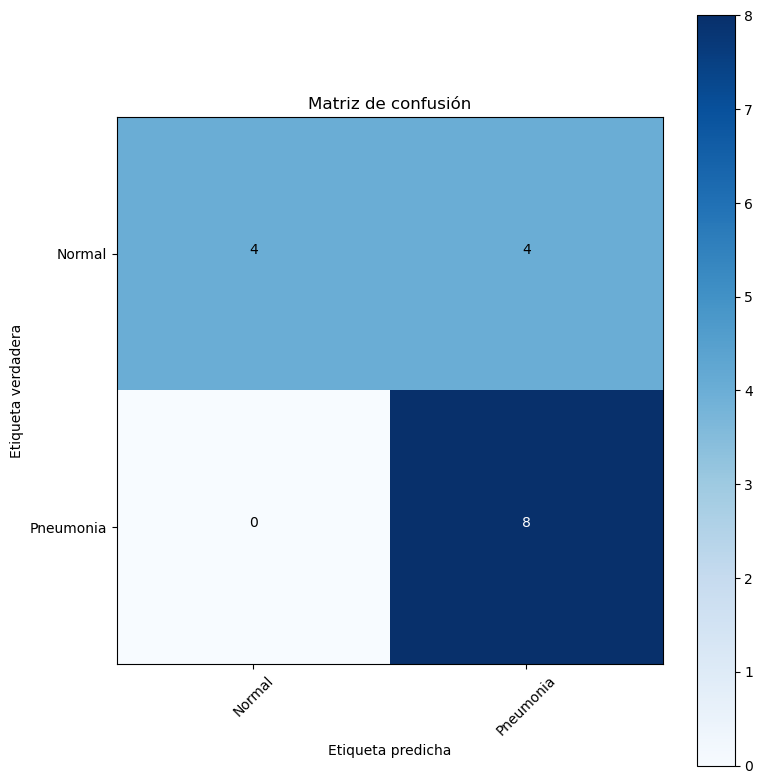

In [199]:
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de confusión')
plt.colorbar()
tick_marks = np.arange(len(CLASS_NAMES))
plt.xticks(tick_marks, CLASS_NAMES, rotation=45)
plt.yticks(tick_marks, CLASS_NAMES)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
    

plt.tight_layout()
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.show()

### Funciones para imprimir las imágenes de laspreddiciones

In [200]:
def predict_folder(folder_path):
    # Obtener la lista de nombres de archivo de la carpeta
    filenames = os.listdir(folder_path)

    for filename in filenames:
        # Obtener la ruta completa del archivo de imagen
        img_path = os.path.join(folder_path, filename)

        # Cargar la imagen como un arreglo numpy
        img_array = img_to_array(load_img(img_path, color_mode='grayscale', target_size=(IMG_HEIGHT, IMG_WIDTH)))

        # Añadir una dimensión extra para que tenga forma (1, IMG_HEIGHT, IMG_WIDTH, 3)
        img_array = np.expand_dims(img_array, axis=0)

        # Preprocesar la imagen dividiendo cada pixel entre 255
        img_array = img_array / 255.0

        # Predecir la categoría de la imagen y mostrar la etiqueta
        prediction = model.predict(img_array)
        predict_image(img_path, prediction)

def predict_image(img_path, prediction):
    
    # Cargamos la imagen
    img = load_img(img_path, color_mode='grayscale', target_size=(IMG_HEIGHT, IMG_WIDTH))
    # Convertimos el arreglo de predicciones a una etiqueta de texto
    label = CLASS_NAMES[np.argmax(prediction)]
    
    # Mostramos la imagen con la etiqueta de predicción
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(label)
    plt.show()

    # Convertimos la imagen a un array de numpy
    img_array = img_to_array(img)
    
    # Añadimos una dimensión extra al array para que tenga forma (1, IMG_HEIGHT, IMG_WIDTH, 3)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Preprocesamos la imagen dividiendo cada pixel entre 255
    img_array = img_array / 255.0
    
    # Predecimos la categoría de la imagen
    predictions = model.predict(img_array)
    
    # Imprimimos las probabilidades de pertenencia a cada posible categoría
    print('Probabilidades:')
    probabilidades = [[]]
    

    for i in range(len(CLASS_NAMES)):
        probabilidades.append([predictions[0][i]*100, CLASS_NAMES[i]])

    probabilidades.sort(reverse=True)

    for i in range(len(CLASS_NAMES)):
        print('{}: {:.2f}%'.format(probabilidades[i][1], probabilidades[i][0]))
    
    # Imprimimos la categoría más probable
    predicted_class = np.argmax(predictions[0])
    print('Predicción:', CLASS_NAMES[predicted_class])
    print()
    print()


### Procentajes de aciertos de las predicciones

In [201]:
# Evaluamos el modelo con los datos del conjunto de test
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 212ms/step - loss: 0.7018 - accuracy: 0.6875
Test accuracy: 0.6875


### Muestra de las imágenes con los porcentajes de pertenencia a cada clase

1/1 [==============================] - 0s 52ms/step


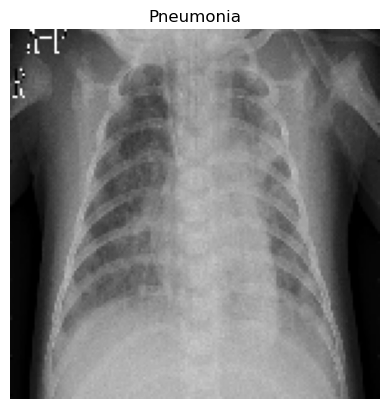

1/1 [==============================] - 0s 18ms/step
Probabilidades:
Pneumonia: 96.51%
Normal: 3.49%
Predicción: Pneumonia


1/1 [==============================] - 0s 17ms/step


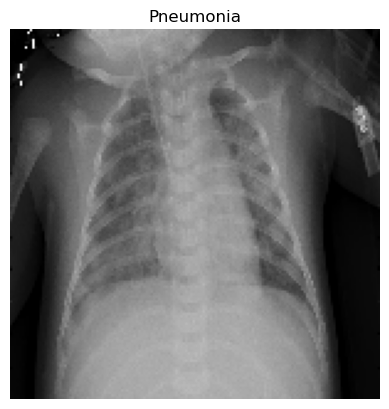

1/1 [==============================] - 0s 16ms/step
Probabilidades:
Pneumonia: 93.51%
Normal: 6.49%
Predicción: Pneumonia


1/1 [==============================] - 0s 16ms/step


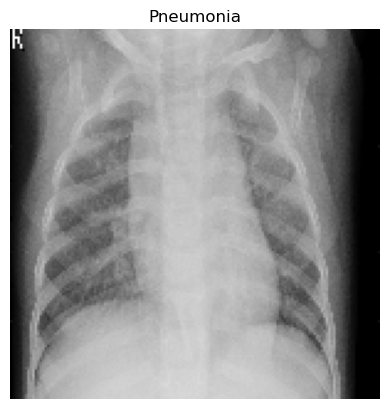

1/1 [==============================] - 0s 17ms/step
Probabilidades:
Pneumonia: 95.27%
Normal: 4.73%
Predicción: Pneumonia


1/1 [==============================] - 0s 16ms/step


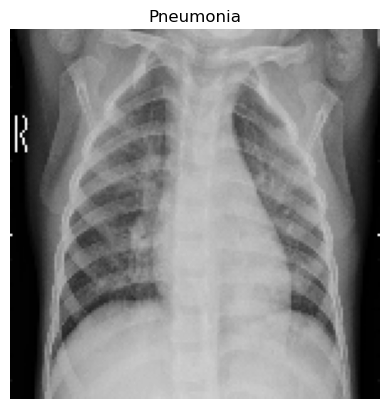

1/1 [==============================] - 0s 17ms/step
Probabilidades:
Pneumonia: 78.84%
Normal: 21.16%
Predicción: Pneumonia


1/1 [==============================] - 0s 18ms/step


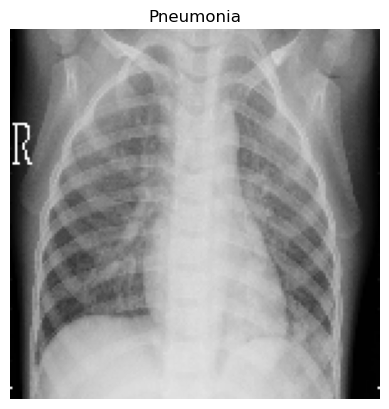

1/1 [==============================] - 0s 19ms/step
Probabilidades:
Pneumonia: 88.18%
Normal: 11.82%
Predicción: Pneumonia


1/1 [==============================] - 0s 17ms/step


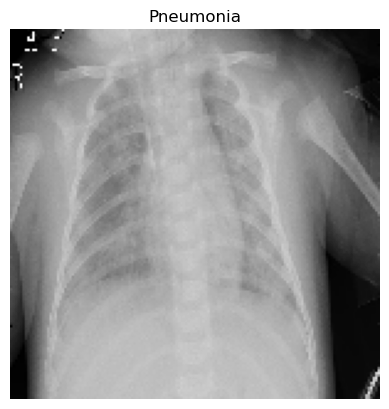

1/1 [==============================] - 0s 20ms/step
Probabilidades:
Pneumonia: 99.22%
Normal: 0.78%
Predicción: Pneumonia


1/1 [==============================] - 0s 19ms/step


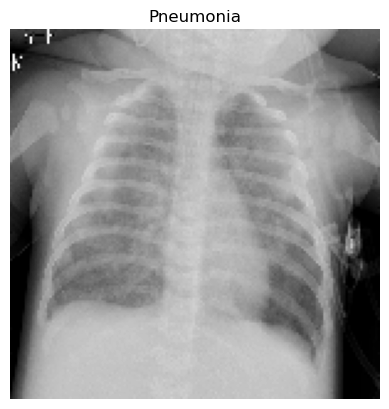

1/1 [==============================] - 0s 19ms/step
Probabilidades:
Pneumonia: 60.53%
Normal: 39.47%
Predicción: Pneumonia


1/1 [==============================] - 0s 19ms/step


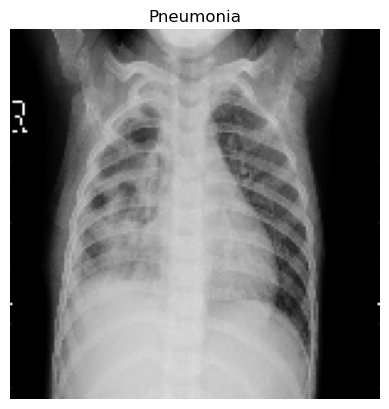

1/1 [==============================] - 0s 19ms/step
Probabilidades:
Pneumonia: 97.49%
Normal: 2.51%
Predicción: Pneumonia




In [202]:
folder_path = './chest_xray/val/PNEUMONIA/'
predict_folder(folder_path)

1/1 [==============================] - 0s 18ms/step


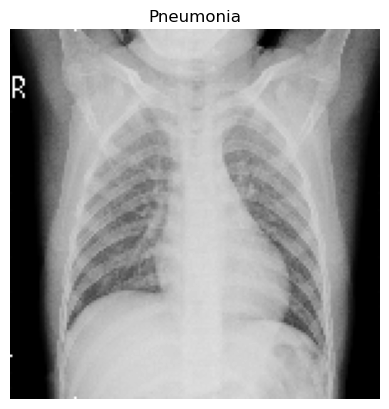

1/1 [==============================] - 0s 17ms/step
Probabilidades:
Pneumonia: 78.62%
Normal: 21.38%
Predicción: Pneumonia


1/1 [==============================] - 0s 18ms/step


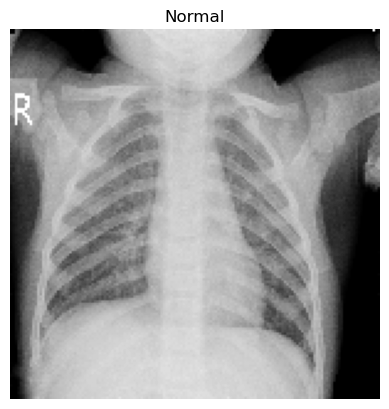

1/1 [==============================] - 0s 19ms/step
Probabilidades:
Normal: 88.74%
Pneumonia: 11.26%
Predicción: Normal


1/1 [==============================] - 0s 19ms/step


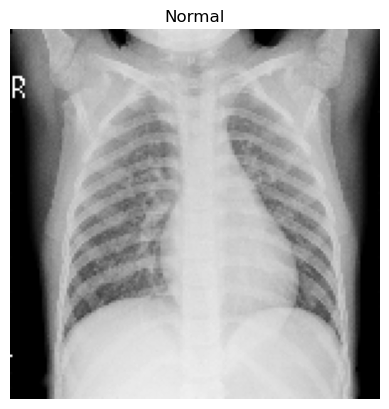

1/1 [==============================] - 0s 18ms/step
Probabilidades:
Normal: 57.09%
Pneumonia: 42.91%
Predicción: Normal


1/1 [==============================] - 0s 18ms/step


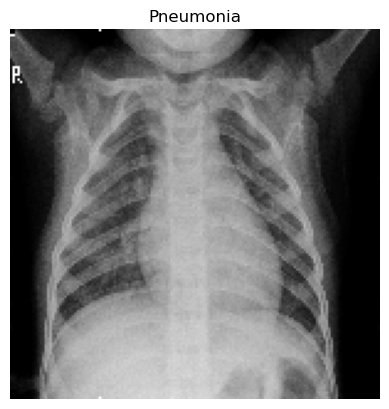

1/1 [==============================] - 0s 17ms/step
Probabilidades:
Pneumonia: 53.19%
Normal: 46.81%
Predicción: Pneumonia


1/1 [==============================] - 0s 17ms/step


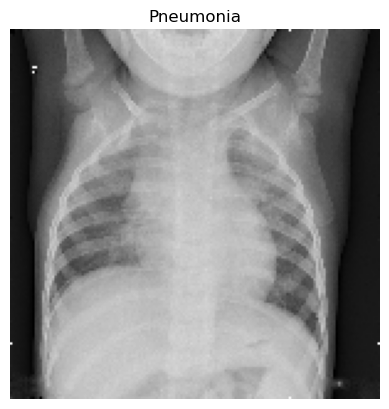

1/1 [==============================] - 0s 16ms/step
Probabilidades:
Pneumonia: 91.46%
Normal: 8.54%
Predicción: Pneumonia


1/1 [==============================] - 0s 21ms/step


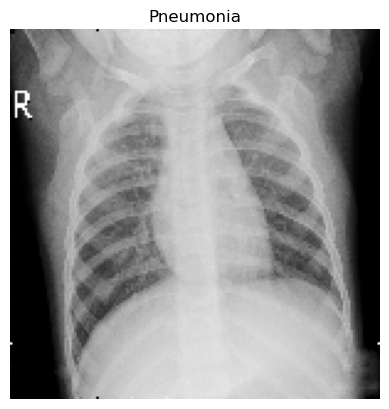

1/1 [==============================] - 0s 16ms/step
Probabilidades:
Pneumonia: 71.59%
Normal: 28.41%
Predicción: Pneumonia


1/1 [==============================] - 0s 18ms/step


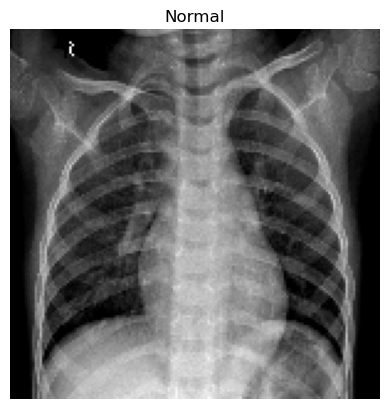

1/1 [==============================] - 0s 16ms/step
Probabilidades:
Normal: 67.95%
Pneumonia: 32.05%
Predicción: Normal


1/1 [==============================] - 0s 16ms/step


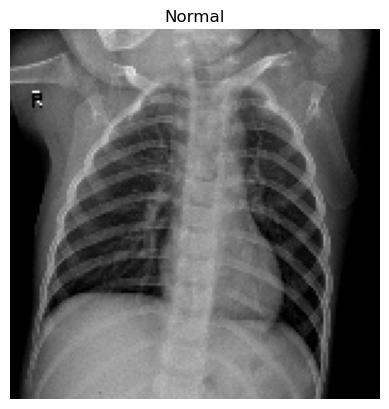

1/1 [==============================] - 0s 17ms/step
Probabilidades:
Normal: 90.00%
Pneumonia: 10.00%
Predicción: Normal




In [203]:
folder_path = './chest_xray/val/NORMAL/'
predict_folder(folder_path)

## CLASIFICADOR 2

In [207]:
def prepare_files(input, out1, out2, name1, name2):
    # loop through each file in the input directory
    for filename in os.listdir(input):
        # extract the name of the file (without extension)
        name = os.path.splitext(filename)[0]
        
        # check if the name contains a certain substring
        if name1 in name:
            # move the file to output directory 1
            shutil.copy(os.path.join(input, filename), out1)
        elif name2 in name:
            # move the file to output directory 2
            shutil.copy(os.path.join(input, filename), out2)
        else:
            # do something else (e.g., print a warning message)
            print(f'Warning: file "{filename}" does not match any pattern')

In [209]:
# define the input and output directories
input_dir = 'chest_xray/train/PNEUMONIA'
output_dir1 = 'chest_xray/CLASS_2/train/Pneumonia/Bacteria'
output_dir2 = 'chest_xray/CLASS_2/train/Pneumonia/Virus'

prepare_files(input_dir, output_dir1, output_dir2, 'bacteria', 'virus')

# define the input and output directories
input_dir = 'chest_xray/test/PNEUMONIA'
output_dir1 = 'chest_xray/CLASS_2/test/Pneumonia/Bacteria'
output_dir2 = 'chest_xray/CLASS_2/test/Pneumonia/Virus'

prepare_files(input_dir, output_dir1, output_dir2, 'bacteria', 'virus')


In [2]:
base_dir = 'chest_xray/CLASS_2'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'test')
test_dir = os.path.join(base_dir, 'Validation')

In [3]:
IMG_WIDTH = 150
IMG_HEIGHT = 150

# definir los parámetros de la red convolucional
input_shape = (IMG_WIDTH, IMG_HEIGHT,1)
num_classes = 3
learning_rate = 0.001
batch_size = 16
epochs = 1000

# Clasificación 1: Pneumonia vs Normal
CLASS_NAMES = ['Normal', 'Pneumonia bacteriana', 'Pneumonia vírica']

In [4]:
# crear generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    )

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2
    )


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical')

Found 5216 images belonging to 3 classes.


In [5]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical')

Found 624 images belonging to 3 classes.


In [6]:
test_generator = val_datagen.flow_from_directory(
    test_dir,
    shuffle=False,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical')

Found 24 images belonging to 3 classes.


In [7]:
# definir la arquitectura de la red
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [8]:
# compilar el modelo
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=categorical_crossentropy,
              metrics=['accuracy'])

In [9]:
# Crear el callback StopTrainingCallback
class StopTrainingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if logs.get('loss') <= 0.2:  # Detener el entrenamiento cuando la périda alcance 0.2
            self.model.stop_training = True
            
stop = StopTrainingCallback()

# Entrenar el modelo con el callback EarlyStopping
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[stop]
)

Epoch 1/1000
326/326 [==============================] - 57s 174ms/step - loss: 0.7556 - accuracy: 0.6520 - val_loss: 0.8908 - val_accuracy: 0.6715
Epoch 2/1000
326/326 [==============================] - 57s 175ms/step - loss: 0.5118 - accuracy: 0.7789 - val_loss: 0.8002 - val_accuracy: 0.7468
Epoch 3/1000
326/326 [==============================] - 57s 175ms/step - loss: 0.4464 - accuracy: 0.8020 - val_loss: 0.8893 - val_accuracy: 0.7548
Epoch 4/1000
326/326 [==============================] - 58s 177ms/step - loss: 0.4198 - accuracy: 0.8188 - val_loss: 1.1752 - val_accuracy: 0.6971
Epoch 5/1000
326/326 [==============================] - 61s 187ms/step - loss: 0.3888 - accuracy: 0.8315 - val_loss: 1.5100 - val_accuracy: 0.6891
Epoch 6/1000
326/326 [==============================] - 61s 187ms/step - loss: 0.3723 - accuracy: 0.8374 - val_loss: 1.5162 - val_accuracy: 0.6042
Epoch 7/1000
326/326 [==============================] - 61s 186ms/step - loss: 0.3306 - accuracy: 0.8514 - val_loss: 1

Text(0.5, 1.0, 'Evolución de precisión')

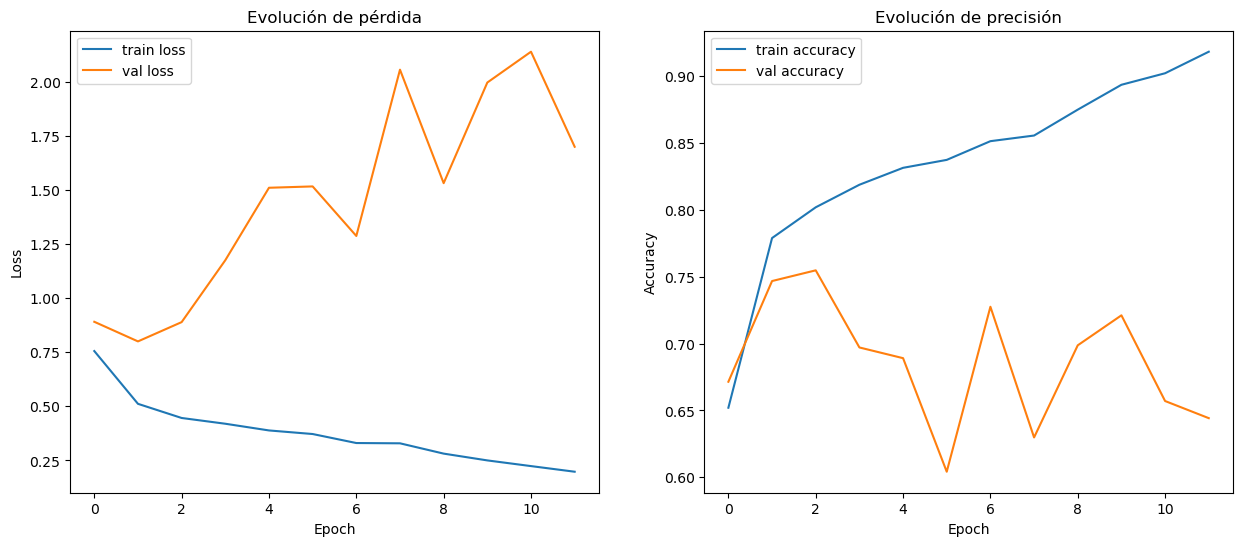

In [10]:
import matplotlib.pyplot as plt

# Obtener los valores de pérdida y precisión del historial de entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fig, ax = plt.subplots(1,2, figsize=(15,6))
ax[0].plot(train_loss, label='train loss')
ax[0].plot(val_loss, label='val loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].set_title('Evolución de pérdida')

ax[1].plot(train_acc, label='train accuracy')
ax[1].plot(val_acc, label='val accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].set_title('Evolución de precisión')

In [11]:
# Hacer predicciones en el conjunto de prueba
test_pred = model.predict(test_generator)
test_pred_labels = np.argmax(test_pred, axis=1)


# Calcular el porcentaje de aciertos
correct_pred = np.sum(test_pred_labels == test_generator.classes)
total_pred = len(test_generator.classes)
accuracy = correct_pred / total_pred * 100

print('Test prediction: {:.2f}%'.format(accuracy))

2/2 [==============================] - 0s 56ms/step
Test prediction: 50.00%


In [12]:
# imprimir la matriz de confusión
test_true_labels = test_generator.classes
cm = confusion_matrix(test_true_labels, test_pred_labels)

print('Matriz de confusión:')
print(cm)

Matriz de confusión:
[[6 0 2]
 [1 6 1]
 [8 0 0]]


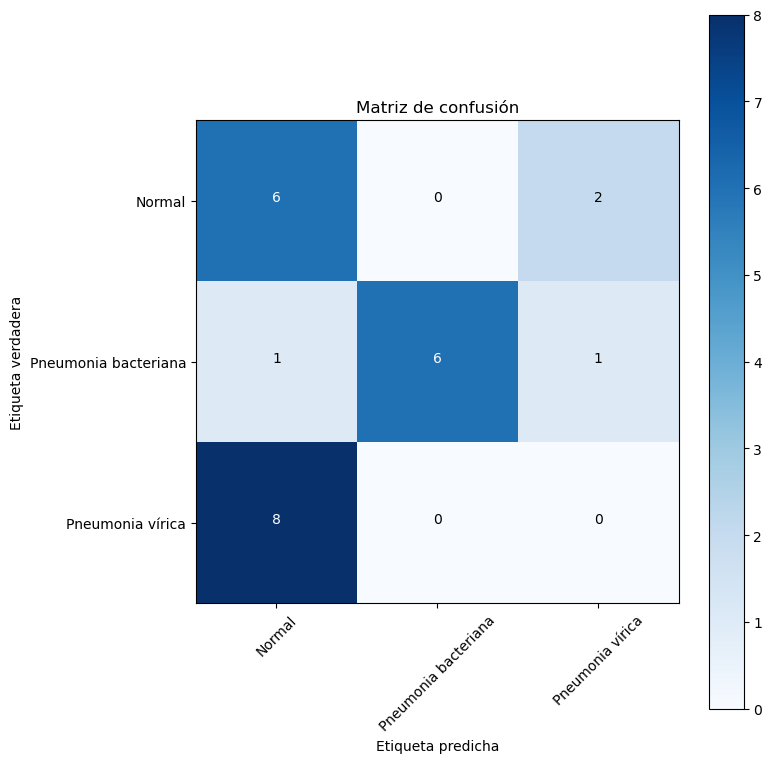

In [13]:
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de confusión')
plt.colorbar()
tick_marks = np.arange(len(CLASS_NAMES))
plt.xticks(tick_marks, CLASS_NAMES, rotation=45)
plt.yticks(tick_marks, CLASS_NAMES)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
    

plt.tight_layout()
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.show()

In [ ]:
def predict_folder(folder_path):
    # Obtener la lista de nombres de archivo de la carpeta
    filenames = os.listdir(folder_path)

    for filename in filenames:
        # Obtener la ruta completa del archivo de imagen
        img_path = os.path.join(folder_path, filename)

        # Cargar la imagen como un arreglo numpy
        img_array = img_to_array(load_img(img_path, color_mode='grayscale', target_size=(IMG_HEIGHT, IMG_WIDTH)))

        # Añadir una dimensión extra para que tenga forma (1, IMG_HEIGHT, IMG_WIDTH, 3)
        img_array = np.expand_dims(img_array, axis=0)

        # Preprocesar la imagen dividiendo cada pixel entre 255
        img_array = img_array / 255.0

        # Predecir la categoría de la imagen y mostrar la etiqueta
        prediction = model.predict(img_array)
        predict_image(img_path, prediction)

def predict_image(img_path, prediction):
    
    # Cargamos la imagen
    img = load_img(img_path, color_mode='grayscale', target_size=(IMG_HEIGHT, IMG_WIDTH))
    # Convertimos el arreglo de predicciones a una etiqueta de texto
    label = CLASS_NAMES[np.argmax(prediction)]
    
    # Mostramos la imagen con la etiqueta de predicción
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(label)
    plt.show()

    # Convertimos la imagen a un array de numpy
    img_array = img_to_array(img)
    
    # Añadimos una dimensión extra al array para que tenga forma (1, IMG_HEIGHT, IMG_WIDTH, 3)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Preprocesamos la imagen dividiendo cada pixel entre 255
    img_array = img_array / 255.0
    
    # Predecimos la categoría de la imagen
    predictions = model.predict(img_array)
    
    # Imprimimos las probabilidades de pertenencia a cada posible categoría
    print('Probabilidades:')
    probabilidades = [[]]
    

    for i in range(len(CLASS_NAMES)):
        probabilidades.append([predictions[0][i]*100, CLASS_NAMES[i]])

    probabilidades.sort(reverse=True)

    for i in range(len(CLASS_NAMES)):
        print('{}: {:.2f}%'.format(probabilidades[i][1], probabilidades[i][0]))
    
    # Imprimimos la categoría más probable
    predicted_class = np.argmax(predictions[0])
    print('Predicción:', CLASS_NAMES[predicted_class])
    print()
    print()


### Muestra de las imágenes con los porcentajes de pertenencia a cada clase